# Workshop 6 Identification of User Segments and 

## Introduction

Reference: Danish Harron: "Python Machine Learning Case Studies" Chapter 1. 2017.

This workshop reviews the concepts of statistics and probability and gets students/participants to familiar with some Python code for the data analytics been used later for A/B Test applications.

The case here about two staff assigned with the task of determining the brand persona for a new cycle share scheme.

#### The analytics is used to present their results at the annual broad meeting in order to lay out a proposal to separate treatment on users. Do you agree with their conclusions. What else you can suggest?

The following libraries are imported to do the calculation (Make use of other people open source codes to develop the algorithm for particular application)

Jupyter notebook is the interface platform for Python high level programme language that one can insert explanations and the codes, along the context as a document so that any readers can follow through the usage of the code and understand the underlying procedures.  Jupyter notebook is very common for python data scientist for mutual reference.    

In [1]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn as sns

## Python libraries: 

random, datetime for common language program function

pandas for data file  or database manilpulation

seaborn for data visulation

statistics, numpy and scipy are for statistical and mathematical formula/function

#### Understand the dataset 

There are always several steps to do with the dataset
1. Load the dataset
2. Check the dimension of the data file
3. Check the time frame
4. Look into features of different variables such as age, gender and usertype

In [2]:
data = pd.read_csv('trip.csv')

In [3]:
print(len(data))
data.head()

146171


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,217565,6/6/2016 9:35,6/6/2016 9:42,SEA00380,434.156,Pine St & 9th Ave,REI / Yale Ave N & John St,SLU-16,SLU-01,Member,Male,1987.0
1,216358,6/3/2016 9:41,6/3/2016 9:47,SEA00410,363.677,Pine St & 9th Ave,REI / Yale Ave N & John St,SLU-16,SLU-01,Member,Male,1987.0
2,173692,12/18/2015 12:00,12/18/2015 12:05,SEA00104,286.030,Pine St & 9th Ave,REI / Yale Ave N & John St,SLU-16,SLU-01,Member,Male,1987.0
3,167290,11/17/2015 18:04,11/17/2015 18:11,SEA00056,416.677,Pine St & 9th Ave,REI / Yale Ave N & John St,SLU-16,SLU-01,Member,Male,1987.0
4,164528,11/5/2015 12:26,11/5/2015 12:32,SEA00153,373.737,Pine St & 9th Ave,REI / Yale Ave N & John St,SLU-16,SLU-01,Member,Male,1987.0


In [4]:
data = data.sort_values(by='starttime')
data.reset_index()
print('Date range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 6/3/2016 9:41 - 10/13/2014 12:39


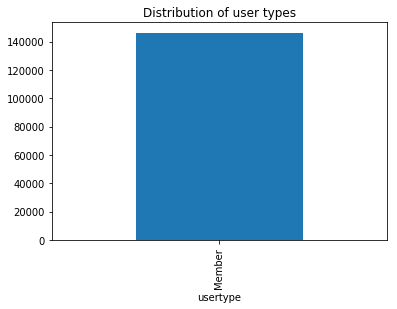

In [5]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')

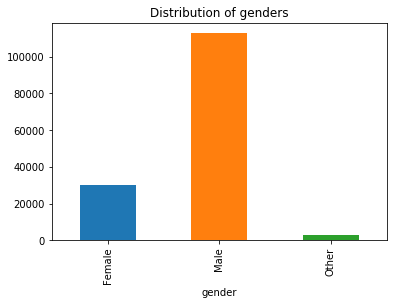

In [6]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

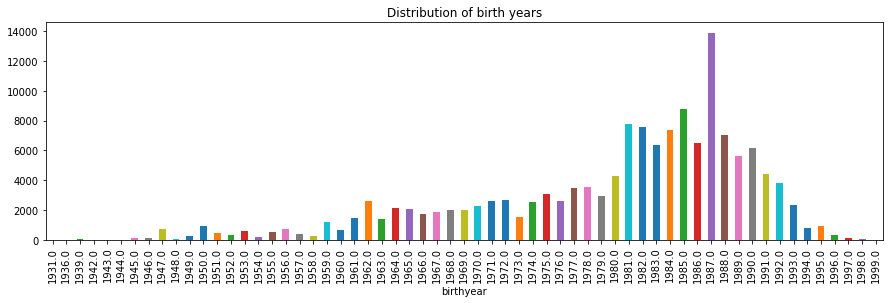

In [7]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))

##### Select a particular age group
Concentrate on age group born between 1977 and 1994

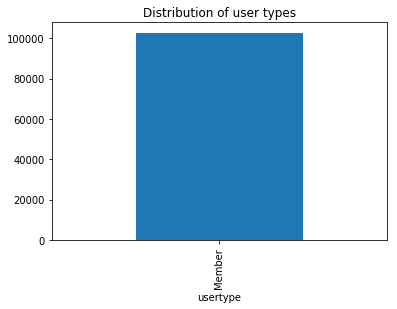

In [8]:

data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

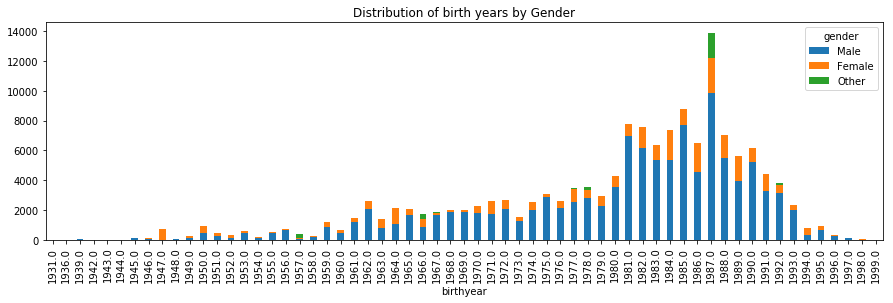

In [9]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', stacked=True, figsize = (15,4))


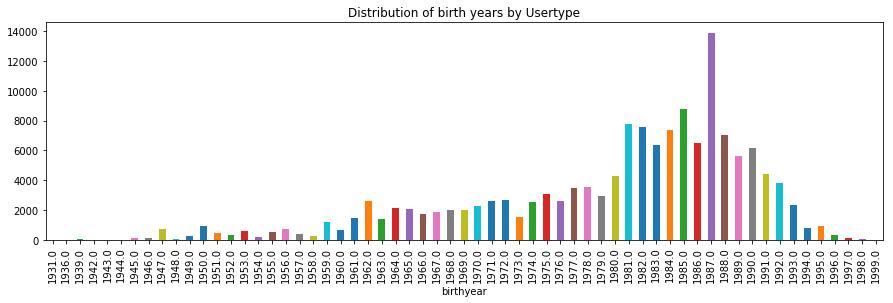

In [10]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

Check about the missing observation in some particular variables

In [11]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [12]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [13]:
List_ = list(data['starttime'])

List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

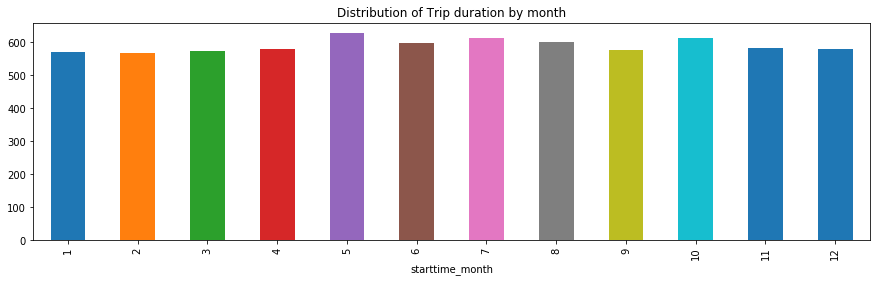

In [14]:
data.groupby('starttime_month')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by month', figsize = (15,4))

#### Distribution of number of trips by year.  Do you see a specific pattern?

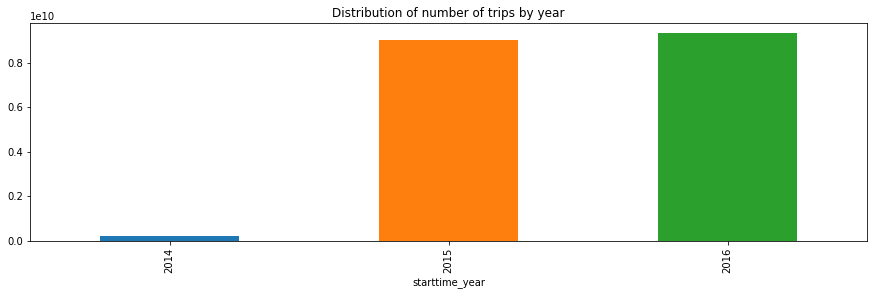

In [15]:
data.groupby('starttime_year')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by year', figsize = (15,4))

#### Distribution of number of trips by month.  Do you see a specific pattern?

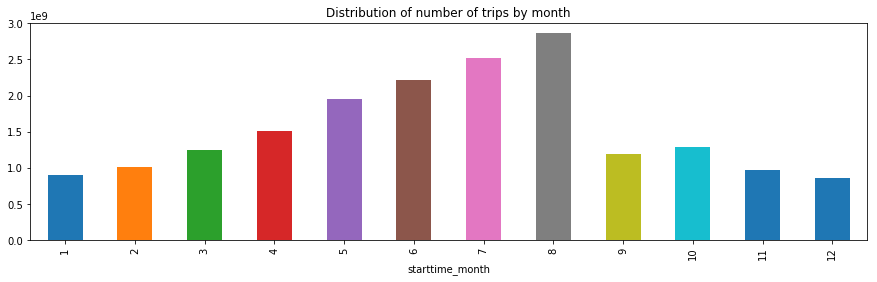

In [16]:
data.groupby('starttime_month')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by month', figsize = (15,4))

#### Determine the distribution of number of trips by day.  Do you see a specific pattern?

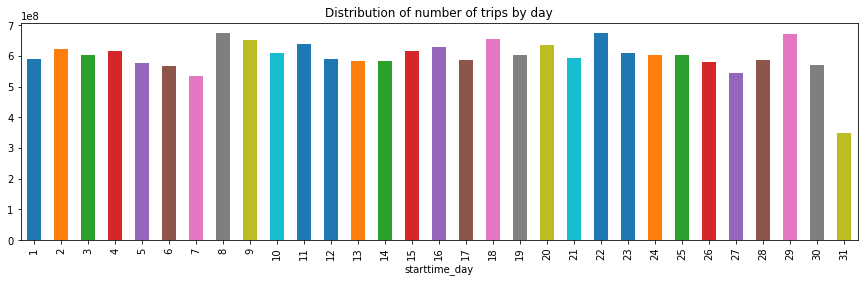

In [17]:
data.groupby('starttime_day')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by day', figsize = (15,4))

#### Distribution of number of trips by hours.  Do you see a specific pattern? what meant hour here?

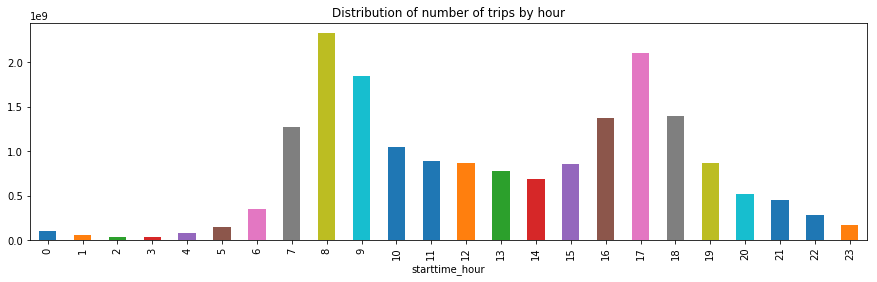

In [18]:
data.groupby('starttime_hour')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by hour', figsize = (15,4))

#### Illustrate frequency distribution of trips on a daily basis

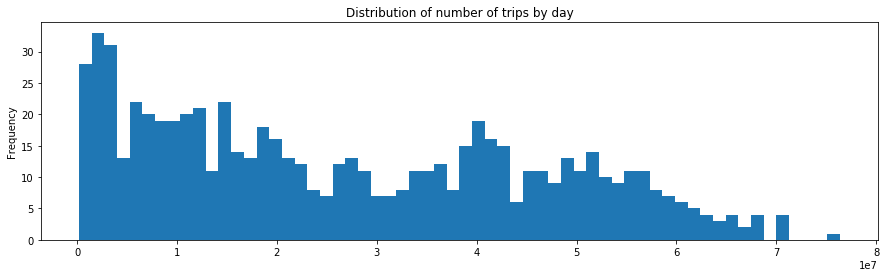

In [19]:
# data.groupby('starttime_date')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by day', figsize = (15,4))
# if one finds confusion, use the histogram with bins equal 60 to 100
data.groupby('starttime_date')['trip_id'].sum().plot.hist(bins=60, title = 'Distribution of number of trips by day', figsize = (15,4))

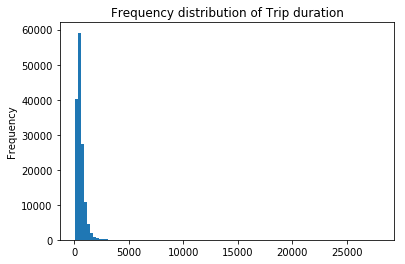

In [20]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

C:\Users\Victorius\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


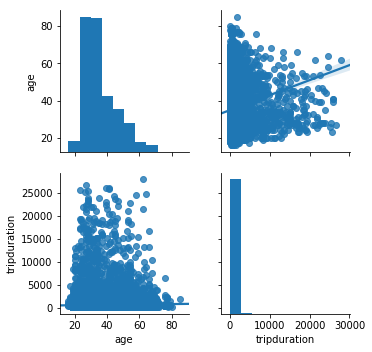

In [25]:
data = data.dropna()
data['age'] = data['starttime_year'] - data['birthyear']
sns.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

In [23]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


Test about the trip duration with respect to different groups of users

In [24]:
data = pd.read_csv('trip.csv')

List_ = list(data['starttime'])

List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

for cat in ['gender','usertype']:

    print('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:

        print('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -38.572176, P value: 0.000000


Female Other
Statistic: 48.248666, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype



Check whether it can applied the Central Limit Theorem

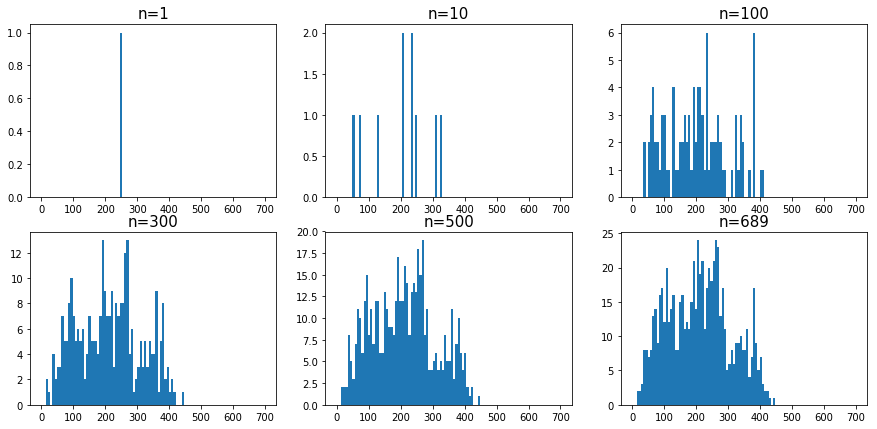

In [22]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1

    if not daily_tickets:
        break
        
plt.show()

### Conclusion: Diferent gender should be treated differently, similarly different types of users should also be treated not the same to enhance theri user experience.

### Check Outliners

#### More information about the trip of the users
1. Trip duration
2. Mode of station originating

In [ ]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f'%statistics.mean(trip_duration))
print('Median of trip duration: %f'%statistics.median(trip_duration))
print('Mode of station originating from: %s'%statistics.mode(station_from))

#### Notes for checking outliner:
1. Outliners are defind outside observation outside the range: [Q1 – 1.5 x (IQR) ,  Q3 + 1.5 x (IQR) ]  (i.e. IQR = Q3 - Q1)
2. Number of outliers values = Number of all values - Number of all non outliers values
3. Ratio of outliers = ( Number of outliers values / Number of all values ) * 100

####  Question: will the above conclusion about separation of treatment in according to gender and type of users be different by eliminating the outliners?

In [ ]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent'%(
    (len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(data))))

In [ ]:
# Grouped boxplot
sns.boxplot(x="gender", y="tripduration", hue="usertype", data=data, palette="Set2")
plt.show()

In [ ]:
data.head()

In [ ]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration (exclude outliners): %f'%mean_trip_duration)

In [ ]:
def transform_tripduration(x):
    
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [ ]:
# Grouped after treated outline boxplot
sns.boxplot(x="gender", y="tripduration_mean", hue="usertype", data=data, palette="Set2")
plt.show()